In [1]:
import sys
!{sys.executable} -m pip install astropy
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scipy
from scipy import optimize
from astropy.io import fits
from astropy.table import Table
from scipy import interpolate
%matplotlib inline
from matplotlib.patches import Rectangle


np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision = 40, suppress = True) #prevents scientific notation for 40 character numbers

/opt/anaconda3/envs/Git_JupyterLab/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
### Read in data file

GSample = pd.read_csv('/Users/edm/Desktop/Untitled spreadsheet - Sheet1.csv')

In [3]:
GSample

,Name,Teff,Tefferr,Parallax,Parallax_unc,PMRA_1,PMRA_unc,PMDec_1,PMDec_unc,RV,...,Best-W1,Best-W1e,Best-W2,Best-W2e,Unnamed: 45,Ch1 - Ch2,Filtflux (Ch1-Ch2),Diff,ch1mch2err,sigma of synth color
0,WISEAJ082507.37+280548.2,416.0,7.0,152.6,2.0,-66.7,0.9,-235.8,0.9,-50.4,...,18.302,0.179,14.655,0.024,NaN,2.676,2.99,-0.314,0.065146,4.819944
1,0503-5648,377.0,10.0,98.3,3.9,759.2,9.3,288.2,10.1,70.7,...,19.823,-1000.000,15.985,0.038,NaN,2.975,3.28,-0.305,0.186078,1.639098
2,1935-1546,487.0,16.0,69.3,3.8,290.2,11.6,43.1,11.5,-9.0,...,18.754,0.289,15.792,0.061,NaN,2.984,3.15,-0.166,0.034482,4.814123
3,WISEJ222055.31-362817.4,487.0,11.0,95.5,2.1,290.1,0.9,-97.1,0.9,-25.5,...,18.287,0.146,14.807,0.024,NaN,2.464,2.76,-0.296,0.060745,4.872799
4,2MASSIJ0415195-093506,743.0,25.0,175.2,1.7,2214.2,1.2,536.1,1.2,31.9,...,15.148,0.026,12.305,0.011,NaN,1.882,2.07,-0.188,0.025495,7.373967
5,WISEJ053516.80-750024.9,576.0,25.0,68.7,2.0,-120.1,0.8,23.6,0.8,-1.7,...,18.366,0.098,14.996,0.020,NaN,2.744,2.62,0.124,0.086585,1.432115
6,WISEPCJ140518.40+553421.4,440.0,14.0,158.2,2.6,-2334.8,1.2,226.8,1.0,-17.0,...,18.270,0.134,14.098,0.014,NaN,NaN,NaN,NaN,NaN,NaN
7,WISEPAJ154151.66-225025.2,NaN,NaN,166.9,2.0,-902.8,0.9,-91.4,0.9,-66.4,...,17.605,0.174,14.218,0.030,NaN,NaN,NaN,NaN,NaN,NaN
8,WISEJ014656.66+423410.0,629.0,20.0,51.7,2.0,-451.6,0.9,-33.1,0.9,NaN,...,19.129,0.309,15.062,0.027,NaN,2.428,2.72,-0.292,0.073376,3.979517
9,J171104.60+350036.8,NaN,NaN,40.3,2.4,-156.3,1.1,-71.2,1.2,NaN,...,17.601,0.063,14.702,0.018,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Variables for Brown Dwarfs (J1416AB)

#radial velocity
#BD_rv=np.asarray(-86.95241909233778)
name = np.asarray(GSample['Name'])
BD_rv = np.asarray(GSample['RV'])

BD_ras = np.asarray(GSample['RAN'])
BD_decs = np.asarray(GSample['DECN'])
# PM RA and Dec
BD_PMD = np.asarray(GSample['PMDec_1'])
BD_PMR = np.asarray(GSample['PMRA_1'])

#parallax
BD_plx = np.asarray(GSample['Parallax'])

In [5]:
### calculate pmtot, vtan, vtot arrays: (takes a long time with MC sampling)
c1 = 0.9779*10**9
c2 = 4.74047

pmtot_arraybd = np.sqrt(BD_PMD**2+BD_PMR**2)
vtan_arraybd = (c2/BD_plx)*pmtot_arraybd
vtot_arraybd = (np.sqrt(vtan_arraybd**2+BD_rv**2))

In [6]:
t_per = -c1*(1/BD_plx*(BD_rv/vtot_arraybd**2))/10**6
d_per = 10**3*(1/BD_plx)*(vtan_arraybd/vtot_arraybd)

(0.0, 1.0)

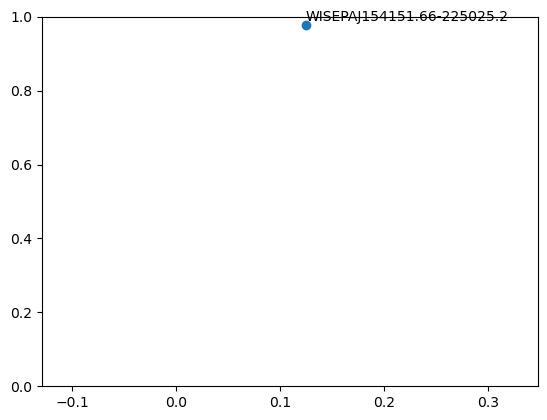

In [7]:
plt.scatter(t_per, d_per)

n = name
for i, txt in enumerate(n):
    plt.annotate(txt, (t_per[np.argsort(-1*d_per)[0:12]][i], d_per[np.argsort(-1*d_per)[0:12]][i]/.99), fontsize = 10, color = 'black')
    
plt.ylim(0,1)